# Oscilador armónico amortiguado

Erwin Renzo Franco Diaz

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sp.init_printing()

Si no se ha dado alguna restricción a las cantidades simbólicas con las que se trabaja, $\texttt{sympy}$ buscará la solución más general a la ecuación de movimiento. Esto nos puede llevar a tener soluciones complejas o por casos. Para evitar esto, especificamos la naturaleza de nuestras cantidades. En este caso, el tiempo, el desplazamiento y las condiciones iniciales son reales, mientras que las constantes además, son positivas.

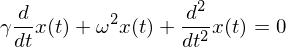

In [2]:
t = sp.symbols('t', real = True)
x = sp.Function('x', real = True)(t)

w = sp.symbols('omega', positive = True)
g = sp.symbols('gamma', positive = True)

x0 = sp.symbols('x_0', real = True)
x0dot = sp.symbols('\dot{x_0}', real = True)

CI = {x.subs(t, 0): x0, sp.diff(x, t).subs(t, 0): x0dot}

eq_damped = sp.Eq(sp.diff(x, (t, 2)) + g*sp.diff(x, t) + w**2*x,  0)

eq_damped

## Caso1: $\gamma = 0.1(2\omega)$

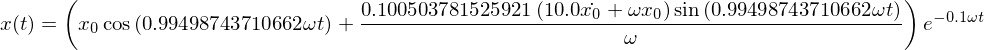

In [3]:
g1 = 0.1*2*w 

eq1 = eq_damped.subs(g, g1)
sol1 = sp.dsolve(eq1, x, ics=CI)

sol1

## Caso 2: $\gamma = 0.5(2\omega)$

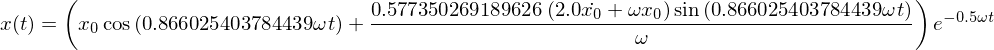

In [4]:
g2 = 0.5*2*w

eq2 = eq_damped.subs(g, g2)
sol2 = sp.dsolve(eq2, x, ics=CI)

sol2

## Caso 3: $\gamma = 0.9(2\omega)$

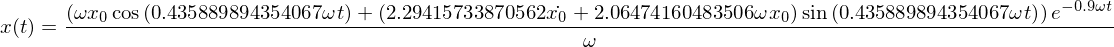

In [5]:
g3 = 0.9*2*w

eq3 = eq_damped.subs(g, g3)
sol3 = sp.dsolve(eq3, x, ics=CI)

sol3 = sol3.rewrite(sp.cos).simplify()
sol3

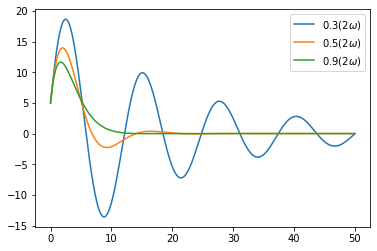

In [11]:
w_num = 0.5
x0_num = 5
x0dot_num = 10

x_num1 = sp.lambdify(t, sol1.subs([(w, w_num), (x0, x0_num), (x0dot, x0dot_num)]).rhs, 'numpy')
x_num2 = sp.lambdify(t, sol2.subs([(w, w_num), (x0, x0_num), (x0dot, x0dot_num)]).rhs, 'numpy')
x_num3 = sp.lambdify(t, sol3.subs([(w, w_num), (x0, x0_num), (x0dot, x0dot_num)]).rhs, 'numpy')

t_plot = np.linspace(0, 50, 1000)
x_plot1 = x_num1(t_plot)
x_plot2 = x_num2(t_plot)
x_plot3 = x_num3(t_plot)

plt.plot(t_plot, x_plot1, t_plot, x_plot2, t_plot, x_plot3)
plt.legend(['$0.3(2\omega)$', '$0.5(2\omega)$', '$0.9(2\omega)$'])

# Dos péndulos acoplados

Indicando que los desplazamientos y las velocidades son reales, y que las constantes son positivas es posible resolver el sistema de ecuaciones de manera analítica.

In [10]:
x1_c = sp.Function('x_1', real = True)(t)
x0_c = sp.Function('x_0', real = True)(t)
v = sp.Function('v', real = True)(t)
u = sp.Function('u', real = True)(t)

m, g, k, l = sp.symbols('m, g, k, l', positive = True)

x10, x00, v0, u0 = sp.symbols('x_1^{(0)}, x_2^{(0)}, v_0, u_0')

eq1 = sp.Eq(v, sp.diff(x1_c, t))
eq2 = sp.Eq(u, sp.diff(x0_c, t))
eq3 = sp.Eq(m*sp.diff(v, t) - m*(g/l)*x1_c - k*(x1_c - x0_c), 0)
eq4 = sp.Eq(m*sp.diff(u, t) - m*(g/l)*x0_c - k*(x0_c - x1_c), 0)

eqs = [eq1, eq2, eq3, eq4]

CI = {x1_c.subs(t, 0): x10, x0_c.subs(t, 0): x00, v.subs(t, 0): v0, u.subs(t, 0): u0}

x1_c, x0_c, v, u = sp.dsolve(eqs, [x1_c, x0_c, v, u], ics = CI)

x1_c = x1_c.rewrite(sp.cos).simplify()
x0_c = x0_c.rewrite(sp.cos).simplify()

La respuesta que da $\texttt{sympy}$ contiene una parte compleja con una constante arbitraria. Esto se debe a que se tiene una exponencial elevada a la raíz de un número negativo, el cual es complejo, por lo que junto con la $i$ en frente resulta, termina siendo real. Lo que se debe hacer entonces, es eliminar esta exponencial compleja usando la identidad de Euler

$$
e^{i\theta} = \cos{\theta} + i\sin{\theta}.
$$

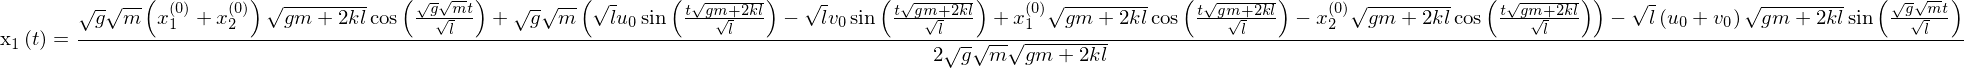

In [34]:
x1_c

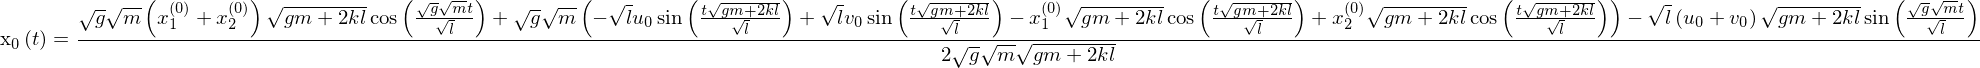

In [36]:
x0_c

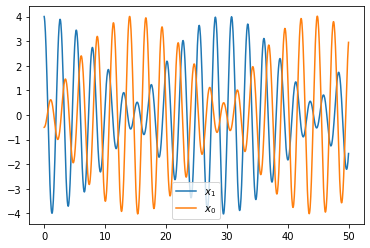

In [33]:
m_num_c = 0.5
g_num_c = 10
k_num_c = 0.5
l_num_c = 1

x10_num = 4
x00_num = -0.5
v0_num = 1
u0_num = 0

subst = [(m, m_num_c), (g, g_num_c), (k, k_num_c), (l, l_num_c), (x10, x10_num), (x00, x00_num), (v0, v0_num), (u0, u0_num)]

x1_num_c = sp.lambdify(t, x1_c.subs(subst).rhs, 'numpy')
x0_num_c = sp.lambdify(t, x0_c.subs(subst).rhs, 'numpy')

x1_plot_c = x1_num_c(t_plot)
x0_plot_c = x0_num_c(t_plot)

plt.plot(t_plot, x1_plot_c, t_plot, x0_plot_c)
plt.legend(['$x_1$', '$x_0$'])
plt.show()

In [ ]:
x0c